In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
!pip install imblearn
from pmlb import fetch_data
Fetched_data= fetch_data('fars')
#print(type(Fetched_data))
X,y = fetch_data('fars',return_X_y=True)
#X = pd.DataFrame(X)
#y=pd.DataFrame(y)

In [2]:
Fetched_data.columns

Index(['CASE_STATE', 'AGE', 'SEX', 'PERSON_TYPE', 'SEATING_POSITION',
       'RESTRAINT_SYSTEM-USE', 'AIR_BAG_AVAILABILITY/DEPLOYMENT', 'EJECTION',
       'EJECTION_PATH', 'EXTRICATION', 'NON_MOTORIST_LOCATION',
       'POLICE_REPORTED_ALCOHOL_INVOLVEMENT', 'METHOD_ALCOHOL_DETERMINATION',
       'ALCOHOL_TEST_TYPE', 'ALCOHOL_TEST_RESULT',
       'POLICE-REPORTED_DRUG_INVOLVEMENT', 'METHOD_OF_DRUG_DETERMINATION',
       'DRUG_TEST_TYPE', 'DRUG_TEST_RESULTS_(1_of_3)',
       'DRUG_TEST_TYPE_(2_of_3)', 'DRUG_TEST_RESULTS_(2_of_3)',
       'DRUG_TEST_TYPE_(3_of_3)', 'DRUG_TEST_RESULTS_(3_of_3)',
       'HISPANIC_ORIGIN', 'TAKEN_TO_HOSPITAL',
       'RELATED_FACTOR_(1)-PERSON_LEVEL', 'RELATED_FACTOR_(2)-PERSON_LEVEL',
       'RELATED_FACTOR_(3)-PERSON_LEVEL', 'RACE', 'target'],
      dtype='object')

In [3]:
Fetched_data.describe()

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,target
count,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,...,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000
mean,23.425977,37.106707,0.683880,3.155832,5.990700,6.400394,4.979053,0.254407,1.084571,0.914656,...,100.089672,2.258102,95.441556,6.098576,1.056018,26.849645,28.935366,19.007507,12.587612,2.782921
std,15.228212,22.109641,0.498972,2.551538,4.794034,1.900097,3.100175,0.670000,2.843937,0.319389,...,295.089512,0.905708,292.121277,1.063206,0.988896,3.256276,2.006201,0.807820,3.110742,1.853606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,20.000000,0.000000,1.000000,3.000000,5.000000,4.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,6.000000,0.000000,27.000000,29.000000,19.000000,11.000000,1.000000
50%,22.000000,32.000000,1.000000,1.000000,3.000000,7.000000,4.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,6.000000,2.000000,27.000000,29.000000,19.000000,11.000000,2.000000
75%,38.000000,49.000000,1.000000,6.000000,6.000000,7.000000,4.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,6.000000,2.000000,27.000000,29.000000,19.000000,15.000000,4.000000
max,50.000000,99.000000,2.000000,9.000000,25.000000,11.000000,12.000000,3.000000,9.000000,2.000000,...,999.000000,6.000000,999.000000,8.000000,2.000000,44.000000,47.000000,32.000000,17.000000,7.000000


In [56]:
column = Fetched_data.groupby('target').count()

column


,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_TYPE_(2_of_3),DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE
target,,,,,,,,,,,,,,,,,,,,,
0,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
1,42116,42116,42116,42116,42116,42116,42116,42116,42116,42116,...,42116,42116,42116,42116,42116,42116,42116,42116,42116,42116
2,15072,15072,15072,15072,15072,15072,15072,15072,15072,15072,...,15072,15072,15072,15072,15072,15072,15072,15072,15072,15072
3,299,299,299,299,299,299,299,299,299,299,...,299,299,299,299,299,299,299,299,299,299
4,20007,20007,20007,20007,20007,20007,20007,20007,20007,20007,...,20007,20007,20007,20007,20007,20007,20007,20007,20007,20007
5,13890,13890,13890,13890,13890,13890,13890,13890,13890,13890,...,13890,13890,13890,13890,13890,13890,13890,13890,13890,13890
6,8674,8674,8674,8674,8674,8674,8674,8674,8674,8674,...,8674,8674,8674,8674,8674,8674,8674,8674,8674,8674
7,901,901,901,901,901,901,901,901,901,901,...,901,901,901,901,901,901,901,901,901,901


In [4]:
Fetched_data.head()
Fetched_data.tail()

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,target
100963,50,10,0,6,13,5,4,0,0,1,...,0,2,0,6,2,27,29,19,11,6
100964,50,9,0,6,16,5,4,0,0,1,...,0,2,0,6,2,27,29,19,11,6
100965,50,7,0,6,14,4,4,0,0,1,...,0,2,0,6,2,27,29,19,11,6
100966,50,4,0,6,14,4,4,0,0,1,...,0,2,0,6,2,27,29,19,11,6
100967,50,61,1,1,3,7,4,0,0,1,...,0,2,0,3,0,27,29,19,17,1


In [5]:
Fetched_data.shape


(100968, 30)

In [49]:
Fetched_data['target'].nunique()

8

In [62]:
percent_missing = round(Fetched_data.isnull().sum()/len(Fetched_data)*100,2)
print(percent_missing)

CASE_STATE                             0.0
AGE                                    0.0
SEX                                    0.0
PERSON_TYPE                            0.0
SEATING_POSITION                       0.0
RESTRAINT_SYSTEM-USE                   0.0
AIR_BAG_AVAILABILITY/DEPLOYMENT        0.0
EJECTION                               0.0
EJECTION_PATH                          0.0
EXTRICATION                            0.0
NON_MOTORIST_LOCATION                  0.0
POLICE_REPORTED_ALCOHOL_INVOLVEMENT    0.0
METHOD_ALCOHOL_DETERMINATION           0.0
ALCOHOL_TEST_TYPE                      0.0
ALCOHOL_TEST_RESULT                    0.0
POLICE-REPORTED_DRUG_INVOLVEMENT       0.0
METHOD_OF_DRUG_DETERMINATION           0.0
DRUG_TEST_TYPE                         0.0
DRUG_TEST_RESULTS_(1_of_3)             0.0
DRUG_TEST_TYPE_(2_of_3)                0.0
DRUG_TEST_RESULTS_(2_of_3)             0.0
DRUG_TEST_TYPE_(3_of_3)                0.0
DRUG_TEST_RESULTS_(3_of_3)             0.0
HISPANIC_OR

<AxesSubplot:>

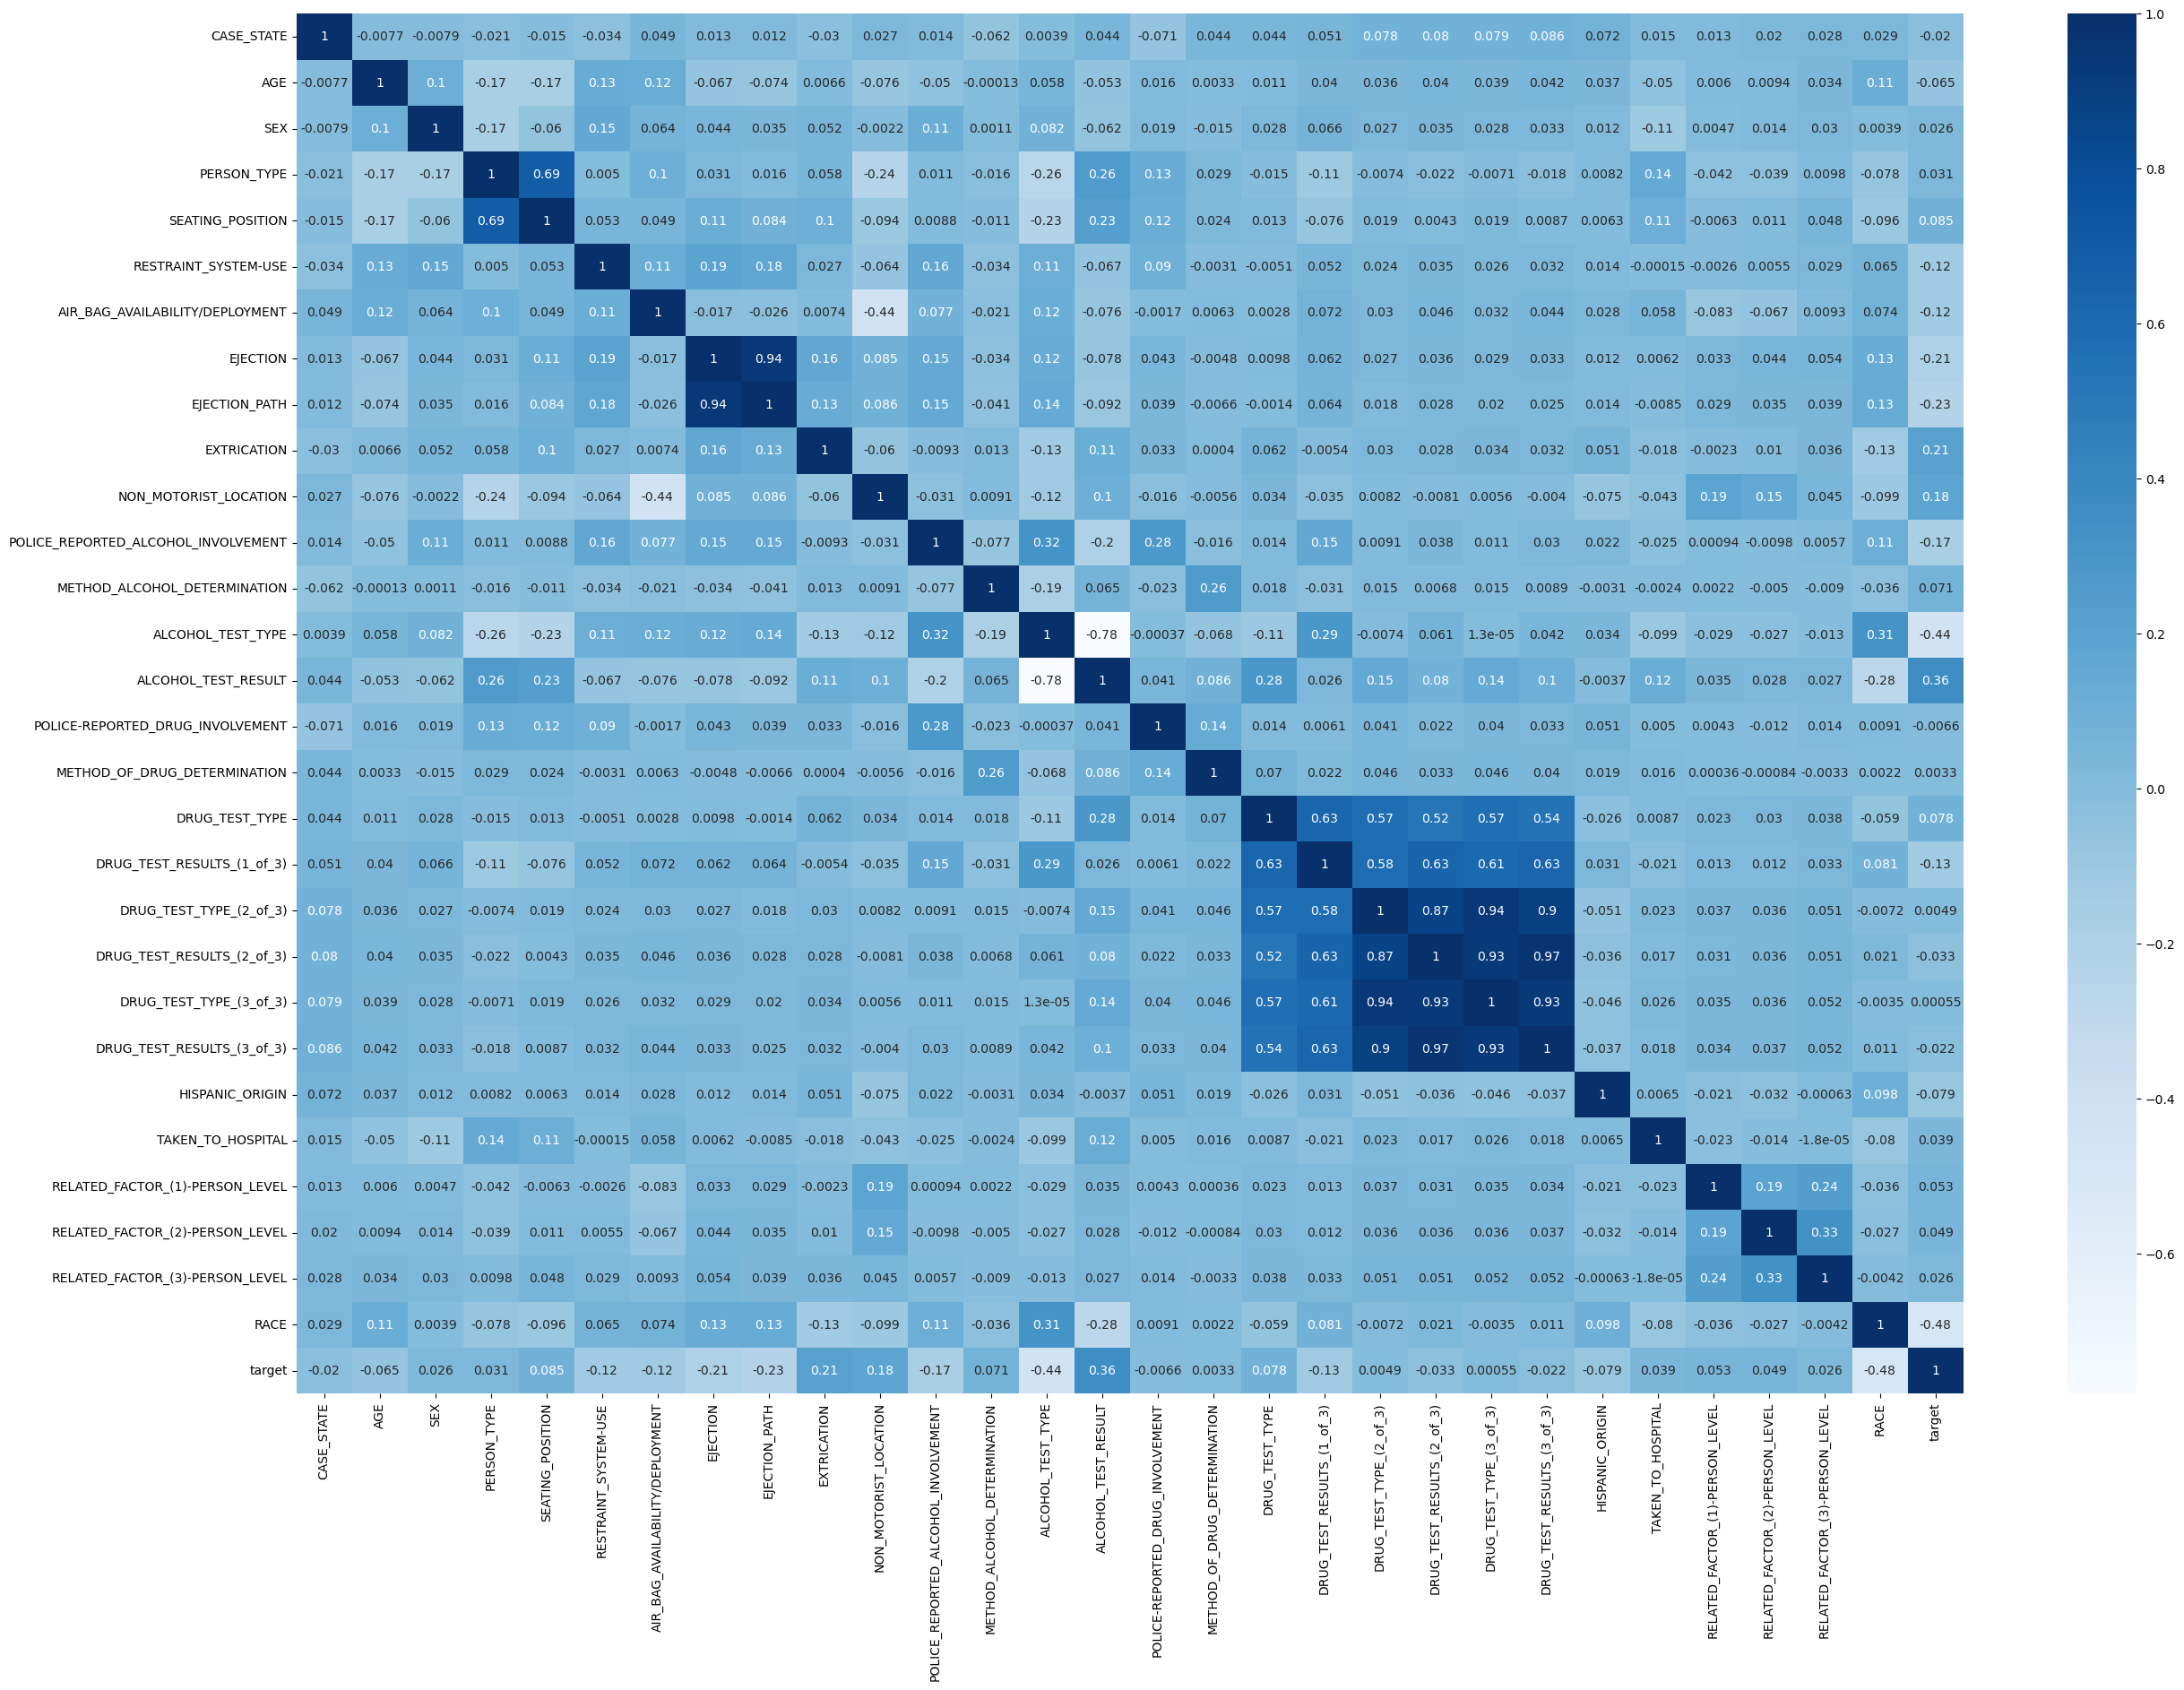

In [67]:
plt.figure(figsize=(30,20))
sns.heatmap(Fetched_data.corr(),cbar=True,annot=True,cmap='Blues')

In [3]:
#SMOTE - oversampling technique to increase the train data for all the classes
from collections import Counter
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))
print(type(x_smote
          ))

Original dataset shape Counter({1: 42116, 4: 20007, 2: 15072, 5: 13890, 6: 8674, 7: 901, 3: 299, 0: 9})
Resample dataset shape Counter({1: 42116, 2: 42116, 4: 42116, 6: 42116, 7: 42116, 5: 42116, 3: 42116, 0: 42116})
<class 'numpy.ndarray'>


In [4]:
#normalisation technique - standard scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn import preprocessing
scaler.fit(x_smote)
scaled_features = scaler.transform(x_smote)
df=pd.DataFrame(scaled_features)
print(df)

              0         1         2         3         4         5         6   \
0      -1.626914 -0.478974  0.367635 -0.797068 -0.573843  0.106095 -1.003247   
1      -1.626914 -0.950178  0.367635 -0.797068 -0.573843  0.106095  1.071948   
2      -1.626914 -0.176058  0.367635 -0.797068 -0.573843 -0.770813 -0.410334   
3      -1.626914 -0.344345 -1.178977  1.267666 -0.034266 -0.770813 -0.410334   
4      -1.626914  0.059544  0.367635 -0.797068 -0.573843 -0.770813  1.071948   
...          ...       ...       ...       ...       ...       ...       ...   
336923 -1.282940  1.708756  1.914248 -0.797068 -0.573843  1.859910  1.961317   
336924  0.987285  1.708756  1.914248 -0.797068  3.383050  1.859910  1.961317   
336925  0.780901  1.708756  1.914248 -0.797068  3.383050  1.859910  1.961317   
336926  1.331259  1.708756  1.914248 -0.797068 -0.573843  1.859910  1.961317   
336927  0.987285  1.708756  1.914248  1.267666  3.383050  1.859910  1.961317   

              7         8         9   .

In [69]:
# testing accuracy -KNN before class imbalance correction

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.20)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(pred)
print(classification_report(y_test,pred))

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[1 2 5 ... 1 7 1]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.97      0.97      0.97      8400
           2       0.45      0.43      0.44      3057
           3       0.39      0.32      0.35        63
           4       0.78      0.77      0.77      4045
           5       0.37      0.40      0.39      2722
           6       0.25      0.26      0.25      1721
           7       0.64      0.64      0.64       185

    accuracy                           0.70     20194
   macro avg       0.48      0.47      0.48     20194
weighted avg       0.71      0.70      0.71     20194



In [16]:
# testing accuracy - KNN after class imbalance correction

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(df,y_smote,
                                                    test_size=0.20)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(pred)
print(classification_report(y_test,pred))

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[3 2 2 ... 3 1 5]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8314
           1       1.00      0.99      1.00      8428
           2       0.76      0.75      0.75      8495
           3       0.98      0.99      0.99      8463
           4       0.89      0.87      0.88      8303
           5       0.70      0.71      0.70      8430
           6       0.73      0.73      0.73      8559
           7       0.98      0.99      0.98      8394

    accuracy                           0.88     67386
   macro avg       0.88      0.88      0.88     67386
weighted avg       0.88      0.88      0.88     67386



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.90      0.96      0.93      8374
           1       0.93      0.86      0.89      8536
           2       0.52      0.37      0.44      8495
           3       0.61      0.65      0.63      8405
           4       0.64      0.86      0.74      8314
           5       0.36      0.57      0.44      8434
           6       0.47      0.16      0.23      8458
           7       0.87      0.85      0.86      8370

    accuracy                           0.66     67386
   macro avg       0.66      0.66      0.65     67386
weighted avg       0.66      0.66      0.64     67386

[[8072  134   44   23  363   54  148  107]
 [   0 7330   44   63  106   75  144  122]
 [   0  174 3176  684    0 1432  578   14]
 [  78  193 1256 5424    3 1207  754   11]
 [ 212  307    0  152 7139  289 2321  668]
 [   0  115 3759 1608   17 4831 3105   30]
 [  12  157  210  226   88  504 1321  273]
 [   0  126    6  225  598   42   87 7145]]


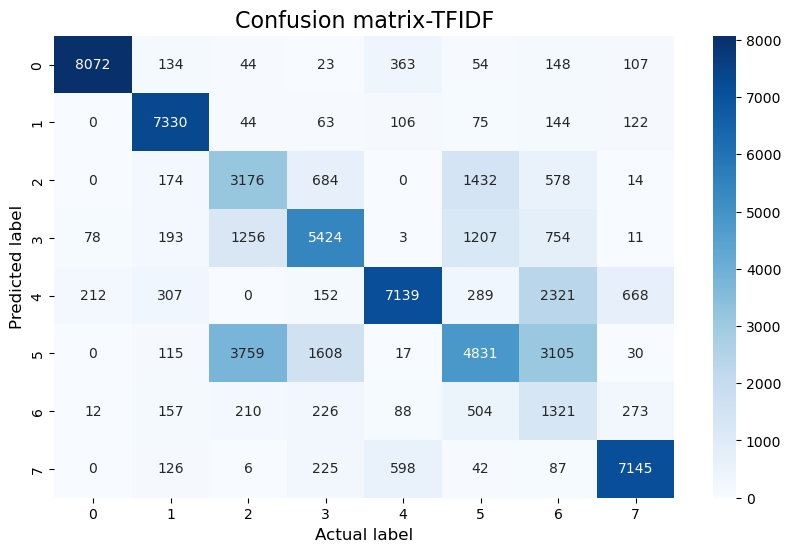

In [83]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(df,y_smote,
                                                    test_size=0.20)
classifier = LogisticRegression(random_state = 10)
classifier.fit(X_train, y_train)
log_pred = classifier.predict(X_test)
print(classification_report(y_test, log_pred))

cm = confusion_matrix(log_pred, y_test)
print(cm)
# plot confusion matrix 
plt.figure(figsize=(10,6))
pred_classes = ['0','1','2','3','4','5','6','7']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=pred_classes,
            yticklabels=pred_classes)
plt.title('Confusion matrix-TFIDF', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Text(0, 0.5, 'Error Rate')

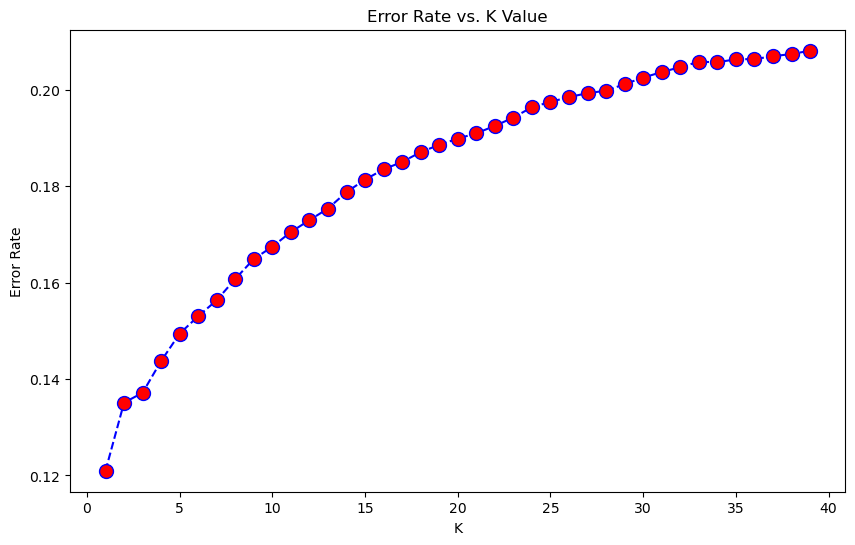

In [17]:
#hyperparameter tuning wit KNN

error_rate = []

# Will take some time
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))  #average error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [74]:
# testing accuracy - KNN after class imbalance correction

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(df,y_smote,
                                                    test_size=0.20)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(pred)
print(classification_report(y_test,pred))

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[2 1 6 ... 5 5 4]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8505
           1       1.00      0.99      0.99      8350
           2       0.63      0.68      0.65      8354
           3       0.92      1.00      0.96      8305
           4       0.79      0.88      0.84      8542
           5       0.60      0.55      0.57      8526
           6       0.65      0.51      0.57      8517
           7       0.95      0.98      0.97      8287

    accuracy                           0.82     67386
   macro avg       0.82      0.82      0.82     67386
weighted avg       0.82      0.82      0.82     67386



In [5]:
#decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.20)
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8467
           1       1.00      1.00      1.00      8327
           2       0.76      0.77      0.76      8233
           3       0.98      1.00      0.99      8671
           4       0.88      0.88      0.88      8590
           5       0.71      0.70      0.71      8319
           6       0.73      0.71      0.72      8376
           7       0.97      0.99      0.98      8403

    accuracy                           0.88     67386
   macro avg       0.88      0.88      0.88     67386
weighted avg       0.88      0.88      0.88     67386

[[8465    0    0    0    2    0    0    0]
 [   0 8311    1    0    0    0    1   14]
 [   0    0 6304   45    6 1311  560    7]
 [   0    0    3 8642    1   11   14    0]
 [   3    0    8    8 7582  122  706  161]
 [   0    1 1393   45  173 5803  884   20]
 [   1    1  613   43  845  887 5939   47]
 [   0    1    6    4   48    8   21 8315]]


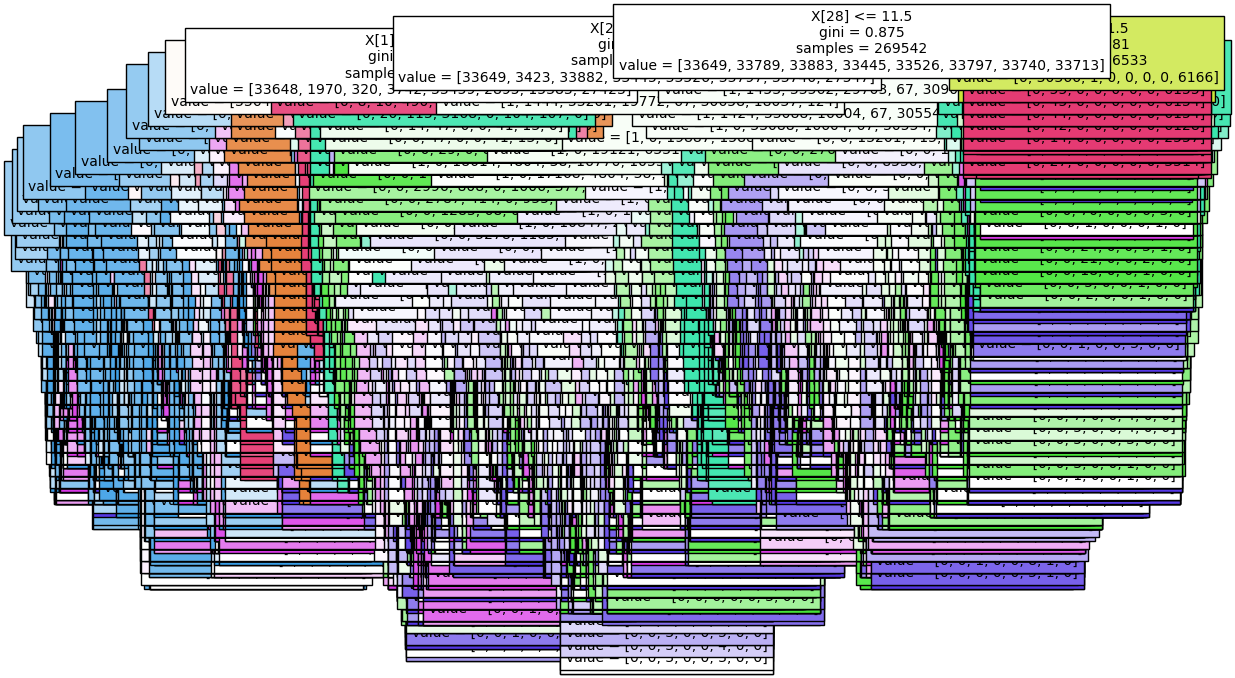

In [7]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(dtree, filled=True, fontsize=10)
plt.show()


In [14]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.20)
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print("CONFUSSION MATRIX:")
print(confusion_matrix(y_test,rfc_pred))
print("ACCURACY REPORT:")
print(classification_report(y_test,rfc_pred))

CONFUSSION MATRIX:
[[8406    0    0    0    1    1    0    0]
 [   0 8437    0    0    0    0    0    9]
 [   0    0 6754   21    5 1140  428    3]
 [   0    0    5 8459    2    0   11    0]
 [   1    0    4    3 7884   64  447   98]
 [   0    0 1258   37  172 6180  797   11]
 [   0    0  540   33  708  783 6212   18]
 [   0    1    3    0   19    3    6 8422]]
ACCURACY REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8408
           1       1.00      1.00      1.00      8446
           2       0.79      0.81      0.80      8351
           3       0.99      1.00      0.99      8477
           4       0.90      0.93      0.91      8501
           5       0.76      0.73      0.74      8455
           6       0.79      0.75      0.77      8294
           7       0.98      1.00      0.99      8454

    accuracy                           0.90     67386
   macro avg       0.90      0.90      0.90     67386
weighted avg       0.90

In [15]:
#cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,KFold
rfc = RandomForestClassifier()
kf=KFold(n_splits=8)
score=cross_val_score(rfc,x_smote,y_smote,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.87209137 0.87909583 0.94610124 0.76101719 0.82766645 0.74420648
 0.45429291 0.64391205]
Average Cross Validation score :0.7660479390255485
